# Первичный анализ данных фондового рынка Италии 2016 г. 

#### Порхаев Виталий, Клыков Георгий, 22ПМИ-1

#### 1 задание
Фондовый рынок Италии является одним из старейших рынков в мире, который оказал заметное влияние на формирование всей современной финансовой системы. Слово «биржа», вошедшее во все современные языки, происходит от латинского «bursa» — кожаный мешок для хранения денег, а первая ценная бумага (переводной вексель) появилась в Италии в XI веке. Основная роль в организации торговли итальянскими акциями принадлежит Итальянской бирже (Borsa Italiana), основанной в 1808г. Наиболее представительный фондовый индекс Италии — FTSE Italia All-Share Index — включает в себя акции около 250 компаний, входящих в индексы FTSE MIB, FTSE Italia Mid Cap, FTSE Italia Small Cap и FTSE Italia All-Share Sector Indices. Самый известный индекс рынка акций Италии — FTSE MIB Index — состоит из 40 наиболее ликвидных акций крупнейших по капитализации компаний Италии («голубых фишек»), суммарная рыночная стоимость которых составляет около 80% общей капитализации фондового рынка Италии. В датасете указаны стоимости закрытия 36 акций из данного индекса в каждый торговый день 2016 года.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import kstest

In [2]:
data = pd.read_csv('stocks.csv')
data

,Date,PST,INWT,ITPG,RACE,STLAM,AZMT,ISP,DIAS,LDOF,...,BMED,GASI,BMPS,RECI,ERG,A2,TRN,BPSI,FBK,EMII
0,04.01.2016,6.965,4.964,14.06,43.67,5.877,21.755,2.982,48.18,12.37,...,6.955,16.20,11690.0,23.64,12.32,1.224,4.718,4.076,7.39,6.780
1,05.01.2016,7.200,5.020,14.27,44.59,6.032,21.508,3.040,49.09,12.86,...,6.860,16.37,11370.0,24.37,12.24,1.238,4.800,4.048,7.35,6.865
2,06.01.2016,7.090,5.010,13.92,44.60,5.718,21.065,2.958,48.80,12.56,...,6.425,16.06,10960.0,24.37,11.91,1.230,4.718,3.960,7.14,6.560
3,07.01.2016,7.050,5.030,13.23,43.15,5.531,20.473,2.908,48.67,12.55,...,6.275,16.03,10600.0,23.96,11.59,1.243,4.730,3.908,7.10,6.410
4,08.01.2016,6.985,5.035,12.93,40.54,5.304,19.911,2.898,48.55,12.38,...,6.265,15.86,10430.0,23.51,11.51,1.235,4.678,3.798,7.27,6.265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,23.12.2016,6.410,4.366,15.27,55.90,6.261,15.762,2.460,55.40,13.48,...,6.900,14.37,1508.0,26.93,10.07,1.213,4.320,3.126,5.51,5.160
252,27.12.2016,6.415,4.376,15.17,55.75,6.333,15.771,2.452,56.40,13.56,...,6.910,14.38,1508.0,27.06,10.20,1.215,4.346,3.120,5.49,5.175
253,28.12.2016,6.345,4.340,15.71,55.85,6.326,15.614,2.432,56.20,13.42,...,6.845,14.19,1508.0,26.74,10.22,1.216,4.290,3.120,5.35,5.110
254,29.12.2016,6.345,4.370,15.46,55.25,6.261,15.673,2.412,56.30,13.30,...,6.875,14.11,1508.0,27.06,10.21,1.219,4.382,3.102,5.37,5.060


#### 2 задание

Найдем логарифмеческие доходности по формуле $R_t = \ln \left( \frac{P_t}{P_{t-1}} \right)$. Вычислим оценки ожидаемых доходностей и стандартных отклонений для каждого актива.

In [3]:
log_returns = np.log(data[data.columns[1:]] / data[data.columns[1:]].shift(1))
log_returns

,PST,INWT,ITPG,RACE,STLAM,AZMT,ISP,DIAS,LDOF,MONC,...,BMED,GASI,BMPS,RECI,ERG,A2,TRN,BPSI,FBK,EMII
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.033183,0.011218,0.014826,0.020848,0.026032,-0.011419,0.019263,0.018711,0.038848,-0.009685,...,-0.013753,0.010439,-0.027755,0.030413,-0.006515,0.011373,0.017231,-0.006893,-0.005427,0.012459
2,-0.015396,-0.001994,-0.024833,0.000224,-0.053460,-0.020812,-0.027344,-0.005925,-0.023605,-0.011419,...,-0.065511,-0.019119,-0.036726,0.000000,-0.027331,-0.006483,-0.017231,-0.021979,-0.028988,-0.045445
3,-0.005658,0.003984,-0.050840,-0.033051,-0.033250,-0.028506,-0.017048,-0.002667,-0.000796,0.004910,...,-0.023623,-0.001870,-0.033398,-0.016967,-0.027236,0.010514,0.002540,-0.013218,-0.005618,-0.023131
4,-0.009263,0.000994,-0.022937,-0.062393,-0.041907,-0.027835,-0.003445,-0.002469,-0.013638,0.008130,...,-0.001595,-0.010662,-0.016168,-0.018960,-0.006926,-0.006457,-0.011055,-0.028551,0.023662,-0.022881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.013349,-0.004570,-0.003269,0.011696,0.021145,0.007578,0.012270,-0.009879,0.008942,0.001837,...,0.008003,0.007684,0.000000,0.027100,0.006976,0.030128,0.011642,-0.006378,0.010949,0.009737
252,0.000780,0.002288,-0.006570,-0.002687,0.011434,0.000571,-0.003257,0.017890,0.005917,0.000000,...,0.001448,0.000696,0.000000,0.004816,0.012827,0.001647,0.006000,-0.001921,-0.003636,0.002903
253,-0.010972,-0.008261,0.034978,0.001792,-0.001106,-0.010005,-0.008190,-0.003552,-0.010378,0.001222,...,-0.009451,-0.013301,0.000000,-0.011896,0.001959,0.000823,-0.012969,0.000000,-0.025832,-0.012640
254,0.000000,0.006889,-0.016041,-0.010801,-0.010328,0.003772,-0.008258,0.001778,-0.008982,0.011540,...,0.004373,-0.005654,0.000000,0.011896,-0.000979,0.002464,0.021219,-0.005786,0.003731,-0.009833


Оценка ожидаемых доходностей $\mu = \frac{1}{N} \sum_{t=1}^{N} R_t$

In [4]:
expected_returns = log_returns.mean()

Оценка стандартных отклонений $\sigma = \sqrt{ \frac{1}{N-1} \sum_{t=1}^{N} \left( R_t - \mu \right)^2 }$

In [5]:
std_devs = log_returns.std()

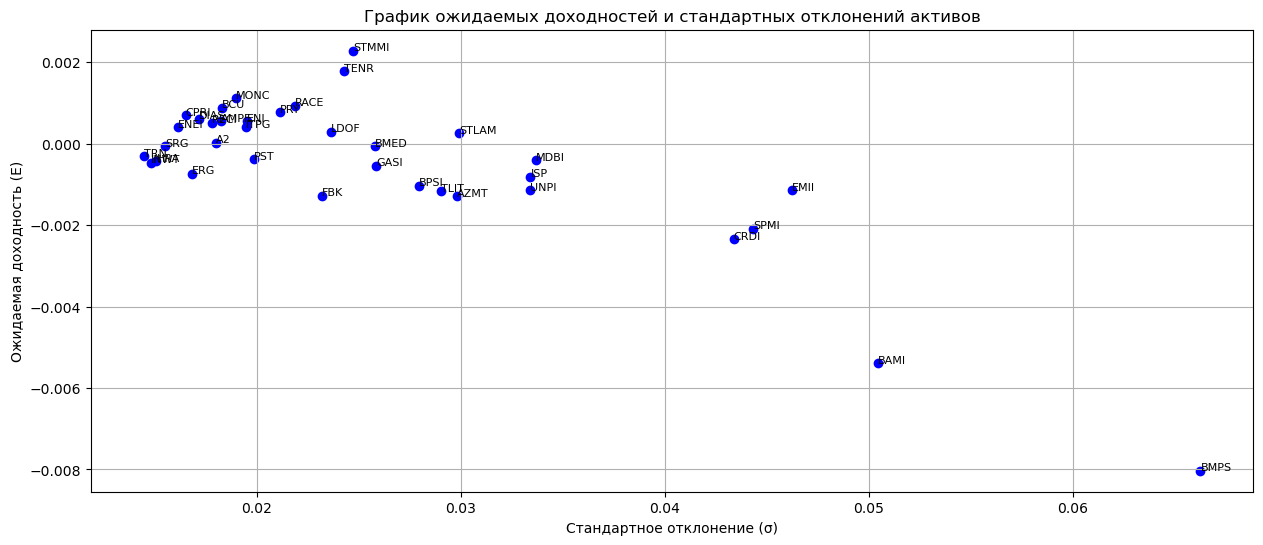

In [6]:
columns_to_process = log_returns.columns

plt.figure(figsize=(15, 6))
plt.scatter(std_devs, expected_returns, c='blue', marker='o')

for stock in columns_to_process:
    plt.text(std_devs[stock], expected_returns[stock], stock, fontsize=8)
    
plt.title('График ожидаемых доходностей и стандартных отклонений активов')
plt.xlabel('Стандартное отклонение (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.grid()
plt.show()

Как можно увидеть на графике, почти 50% активов имеют положительную ожидаемую доходность в пределах от 0 до 0.025. Риск разнится от околонулевого до ~0.07. Нас интересуют акции с наибольшой ожидаемой доходностью и наименьшим риском. 

#### 3 задание

Найдем Парето оптимальные активы - активы, которые нельзя улучшить сразу по двум критериям E и σ

In [7]:
def is_pareto_optimal(risks, returns):
    pareto_optimal = []
    for i in range(len(risks)):
        is_optimal = True
        for j in range(len(returns)):
            if i!= j and returns[j] >= returns[i] and risks[j] <= risks[i]:
                is_optimal = False
                break
        if is_optimal:
            pareto_optimal.append(i)
    return pareto_optimal

pareto_indices = is_pareto_optimal(std_devs, expected_returns)

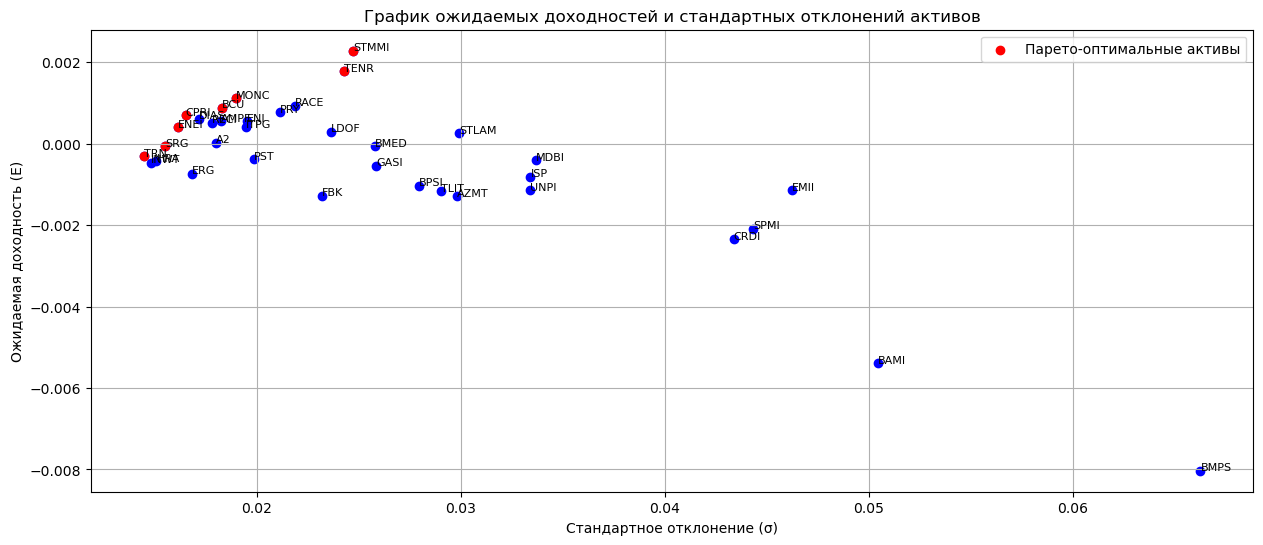

In [8]:
plt.figure(figsize=(15, 6))
plt.scatter(std_devs, expected_returns, c='blue', marker='o')
plt.scatter(std_devs[pareto_indices], expected_returns[pareto_indices], c='red', marker='o', label='Парето-оптимальные активы')

for stock in columns_to_process:
    plt.text(std_devs[stock], expected_returns[stock], stock, fontsize=8)
    
plt.title('График ожидаемых доходностей и стандартных отклонений активов')
plt.xlabel('Стандартное отклонение (σ)')
plt.ylabel('Ожидаемая доходность (E)')
plt.legend()
plt.grid()
plt.show()

Активы, отмеченные красным цветом образуют эффективный фронт. Каждый актив на этом фронте является "оптимальным" в том смысле, что не существует другого актива, который бы предлагал большую доходность при том же уровне риска или меньший риск при той же доходности.

#### 4 задание

Зададим уровень доверия 0,95 и оценим VaR для Парето-оптимальных активов рынка. 

In [9]:
log_returns_pareto = log_returns[['MONC', 'BCU', 'SRG', 'CPRI', 'TENR', 'STMMI', 'ENEI', 'TRN']]
log_returns_pareto = log_returns_pareto.iloc[1:]
log_returns_pareto

,MONC,BCU,SRG,CPRI,TENR,STMMI,ENEI,TRN
1,-0.009685,-0.021774,0.025029,0.015346,0.001850,0.004131,0.018868,0.017231
2,-0.011419,-0.025479,-0.009097,-0.015346,-0.024323,-0.024198,-0.025238,-0.017231
3,0.004910,-0.021520,0.000987,-0.023469,-0.028820,-0.013606,0.004251,0.002540
4,0.008130,-0.015947,0.003940,-0.002642,-0.038753,-0.045542,-0.007985,-0.011055
5,0.016861,-0.001340,0.010512,0.013141,-0.011207,0.023906,0.001068,0.009785
...,...,...,...,...,...,...,...,...
251,0.001837,0.000000,0.018178,0.010834,0.018415,0.011226,0.011228,0.011642
252,0.000000,-0.007528,0.005645,0.000000,0.011703,0.008337,0.010143,0.006000
253,0.001222,0.006528,-0.007191,-0.002157,0.001744,-0.001847,-0.006267,-0.012969
254,0.011540,0.001001,0.009746,0.000000,-0.014624,-0.010218,0.005305,0.021219


In [10]:
def calculate_var(log_returns_pareto, confidence_level = 0.95):
    return np.percentile(log_returns_pareto, (1 - confidence_level) * 100)

pareto_stocks = ['MONC', 'BCU', 'SRG', 'CPRI', 'TENR', 'STMMI', 'ENEI', 'TRN']

var_values = {}
for stock in pareto_stocks:
    var_values[stock] = calculate_var(log_returns_pareto[stock])

# print("VaR для каждого актива на уровне доверия 0.95:")
# for stock, var in var_values.items():
#     print(f"{stock}: {var:.4f}")

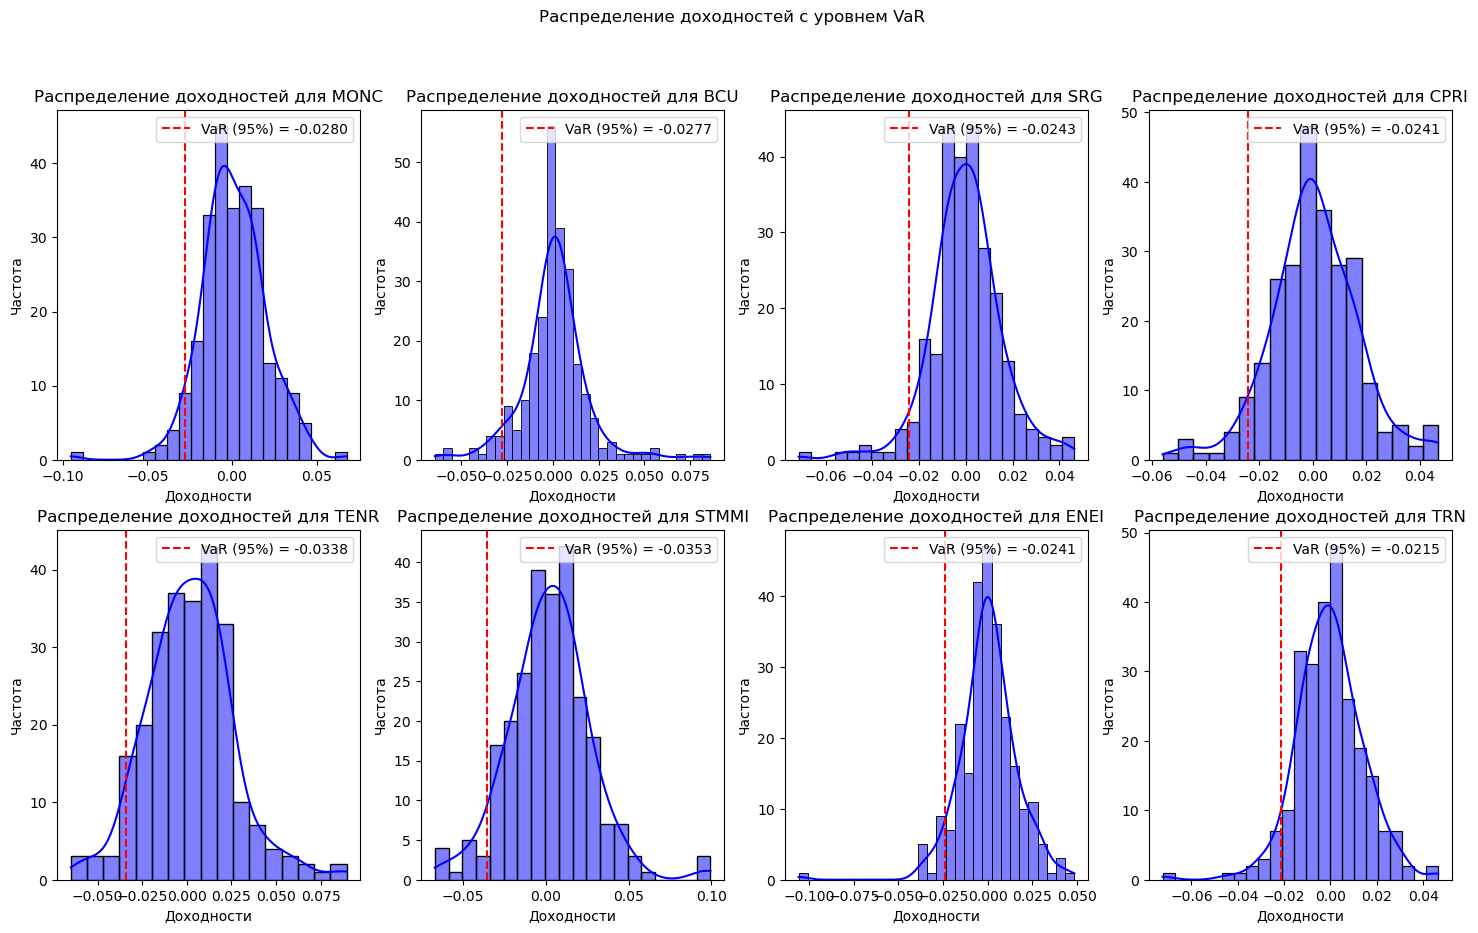

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10)) 
fig.suptitle("Распределение доходностей с уровнем VaR")

axes = axes.flatten()

for i, stock in enumerate(log_returns_pareto.columns):
    sns.histplot(log_returns_pareto[stock], kde=True, ax=axes[i], color='blue')
    axes[i].axvline(x=var_values[stock], color='red', linestyle='--', label=f'VaR (95%) = {var_values[stock]:.4f}')
    axes[i].set_title(f'Распределение доходностей для {stock}')
    axes[i].set_xlabel('Доходности')
    axes[i].set_ylabel('Частота')
    axes[i].legend()

plt.show()

VaR - величина убытков, которая с вероятностью, равной уровню доверия, не будет превышена.  
Характеристика Value at Risk показывает нам, что происходит в случае "плохого сценария". Если мы берем его вероятность - 5%, то граница этого перцентиля и будет стоимостной мерой риска. Актив TRN наиболее предпочтителен по характеристике VaR, так как с вероятностью 95% наша доходность не опускается ниже -0.0215, в то время как в других активых она становится еще меньше. На карте активов TRN - самый левый на эффективном поясе (имеет наименьший риск).

#### 5 задание

Зададим уровень доверия 0,95 и оценим CVaR для Парето-оптимальных активов рынка.

In [12]:
def calculate_cvar(log_returns_pareto, var):
    return log_returns_pareto[log_returns_pareto <= var].mean()

cvar_values = {}
for stock in pareto_stocks:
    var = var_values[stock]
    cvar_values[stock] = calculate_cvar(log_returns_pareto[stock], var)

# print("CVaR для каждого актива:")
# for stock, cvar in cvar_values.items():
#     print(f'{stock}: {cvar:.4f}')

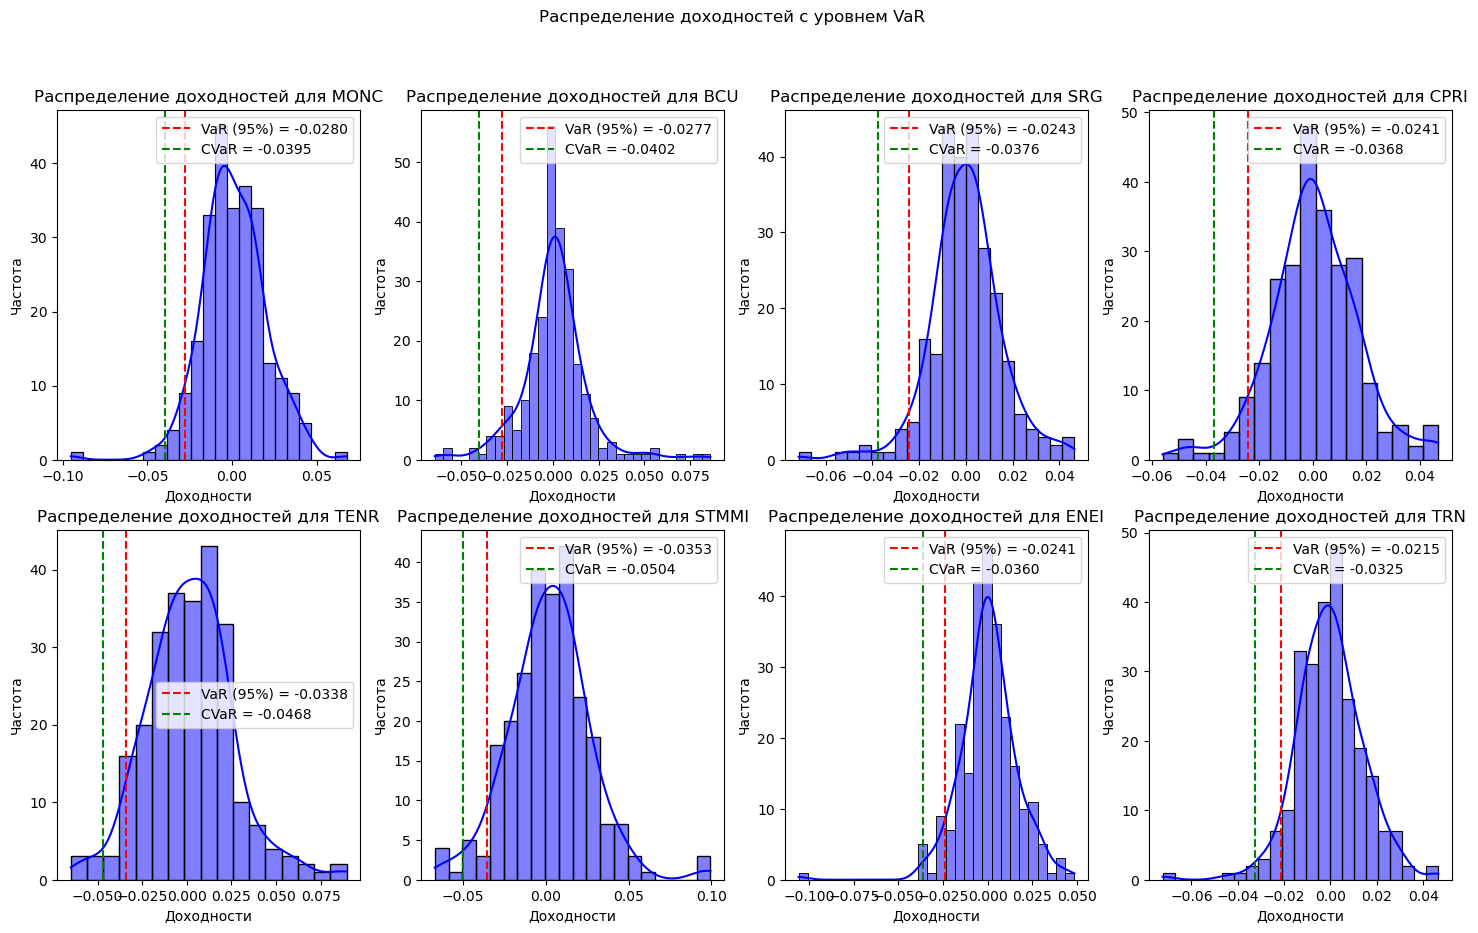

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10)) 
fig.suptitle("Распределение доходностей с уровнем VaR")

axes = axes.flatten()

for i, stock in enumerate(log_returns_pareto.columns):
    sns.histplot(log_returns_pareto[stock], kde=True, ax=axes[i], color='blue')
    axes[i].axvline(x=var_values[stock], color='red', linestyle='--', label=f'VaR (95%) = {var_values[stock]:.4f}')
    axes[i].axvline(x=cvar_values[stock], color='green', linestyle='--', label=f'CVaR = {cvar_values[stock]:.4f}')
    axes[i].set_title(f'Распределение доходностей для {stock}')
    axes[i].set_xlabel('Доходности')
    axes[i].set_ylabel('Частота')
    axes[i].legend()

plt.show()

CVaR - средний ожидаемый размер убытка, при условии, что он превысит ожидаемое значение VaR.  
Актив TRN здесь так же является наиболее предпочтительным по критерию CVaR, так как он имеет наименьшие средние потери в "плохих сценариях". Таким образом, TRN наиболее предпочтителен сразу по двум критериям - VaR и CVaR, что обозначает следующее:  
1) Актив более стабилен и предсказуем при нестабильности на рынке, так как имеет наименьший потенциальный убыток как в обычных условиях, так и в худших 5% случаев  
2) Вследствие п.1 актив имеет наиболее высокую инвестиционную привлекательность, в том числе в период неопределенности и волатильности рынка  
3) Актив подходит для консервативных инвесторов, которых интересует минимизация риска и защита капитала  

#### Задание 6

Выберем 4 актива: CPRI, SRG, TENR, TRN и проверим являются ли наблюдаемые доходности реализацией белого шума(или случайного процесса без корреляции во времени) с помощью теста Льюнга-Бокса на первых 10 лагах. В тесте Люнга-Бокса нулевая гипотеза заключается в том, что все автокоррелляции равны нулю. Заданный уроверь значимости - 0.05  
Автокоррелляция характеризует степень статистической взаимосвязи между элементами данных одного временного ряда. Вычисляется корреляция между временным рядом и его копией, сдвинутой на один или несколько временных отсчетов.

Результаты теста Льюнга-Бокса CPRI:
      lb_stat  lb_pvalue
10  11.117019   0.348474
Результаты теста Льюнга-Бокса SRG:
     lb_stat  lb_pvalue
10  9.433187   0.491544
Результаты теста Льюнга-Бокса TENR:
      lb_stat  lb_pvalue
10  11.575041   0.314503
Результаты теста Льюнга-Бокса TRN:
      lb_stat  lb_pvalue
10  13.273749   0.208766


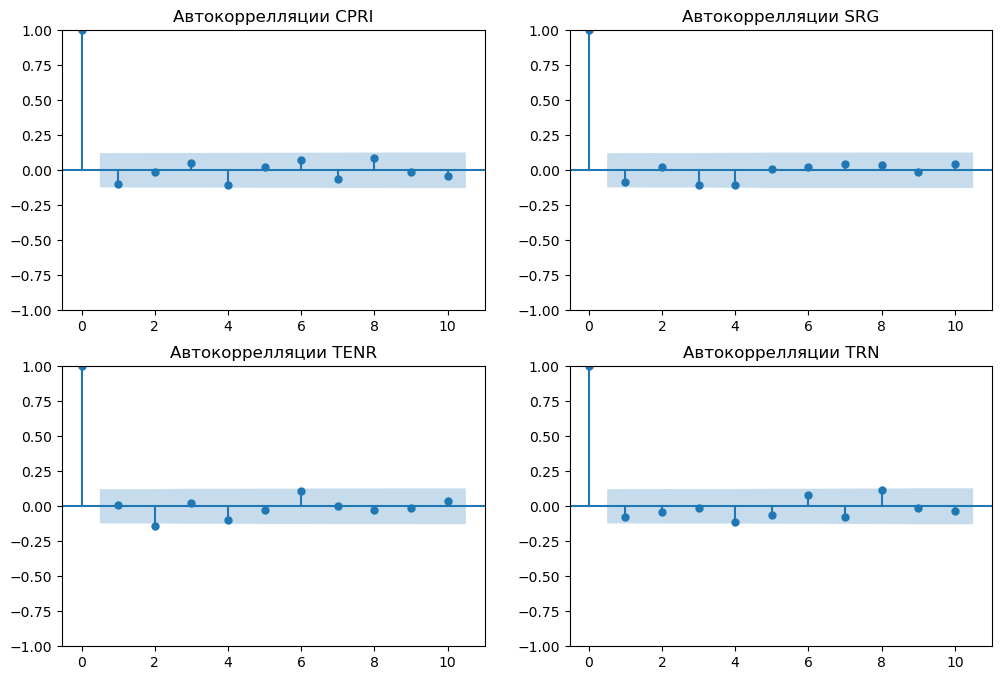

In [14]:
lb_test = sm.stats.acorr_ljungbox(log_returns_pareto['CPRI'], lags=[10], return_df=True)
lb_test_2 = sm.stats.acorr_ljungbox(log_returns_pareto['SRG'], lags=[10], return_df=True)
lb_test_3 = sm.stats.acorr_ljungbox(log_returns_pareto['TENR'], lags=[10], return_df=True)
lb_test_4 = sm.stats.acorr_ljungbox(log_returns_pareto['TRN'], lags=[10], return_df=True)

print("Результаты теста Льюнга-Бокса CPRI:")
print(lb_test)

print("Результаты теста Льюнга-Бокса SRG:")
print(lb_test_2)

print("Результаты теста Льюнга-Бокса TENR:")
print(lb_test_3)

print("Результаты теста Льюнга-Бокса TRN:")
print(lb_test_4)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sm.graphics.tsa.plot_acf(log_returns_pareto['CPRI'], lags=10, ax=axs[0, 0])
axs[0, 0].set_title('Автокоррелляции CPRI')

sm.graphics.tsa.plot_acf(log_returns_pareto['SRG'], lags=10, ax=axs[0, 1])
axs[0, 1].set_title('Автокоррелляции SRG')

sm.graphics.tsa.plot_acf(log_returns_pareto['TENR'], lags=10, ax=axs[1, 0])
axs[1, 0].set_title('Автокоррелляции TENR')

sm.graphics.tsa.plot_acf(log_returns_pareto['TRN'], lags=10, ax=axs[1, 1])
axs[1, 1].set_title('Автокоррелляции TRN')

plt.show()

lb_stat - статистика теста Льюнга-Бокса  
lb_pvalue - вероятность того, что нулевая гипотеза верна  
Все p-value значительно больше уровня значимости 0.05, следовательно, у нас нет оснований отвергать нулевую гипотезу. Автокоррелляция в наших данных незначительна и логарифмические доходности данных 4 активов могут считаться похожими на белый шум (случайными и независимыми)

#### 7 задание

CPRI - одежда, SRG - строительство, TENR - стальная продукция, TRN - высоковольтные линии. Исследуем распределения доходностей этих 4 активов и сравним с нормальным распределением

CPRI Тест Шапиро-Уилка: statistic=0.9797735810279846, p-value=0.001079253270290792
CPRI Тест Колмогорова-Смирнова: statistic=0.48129665442074554, p-value=7.292106260574878e-55

SRG Тест Шапиро-Уилка: statistic=0.9583187103271484, p-value=1.009881884783681e-06
Тест Колмогорова-Смирнова: statistic=0.4815096132399176, p-value=6.480761659719245e-55

TENR Тест Шапиро-Уилка: statistic=0.9802765250205994, p-value=0.0013111152220517397
Тест Колмогорова-Смирнова: statistic=0.4741065161079637, p-value=3.762501243692348e-53

TRN Тест Шапиро-Уилка: statistic=0.9737420082092285, p-value=0.00011878421355504543
Тест Колмогорова-Смирнова: statistic=0.4814570624141309, p-value=6.672211011421173e-55



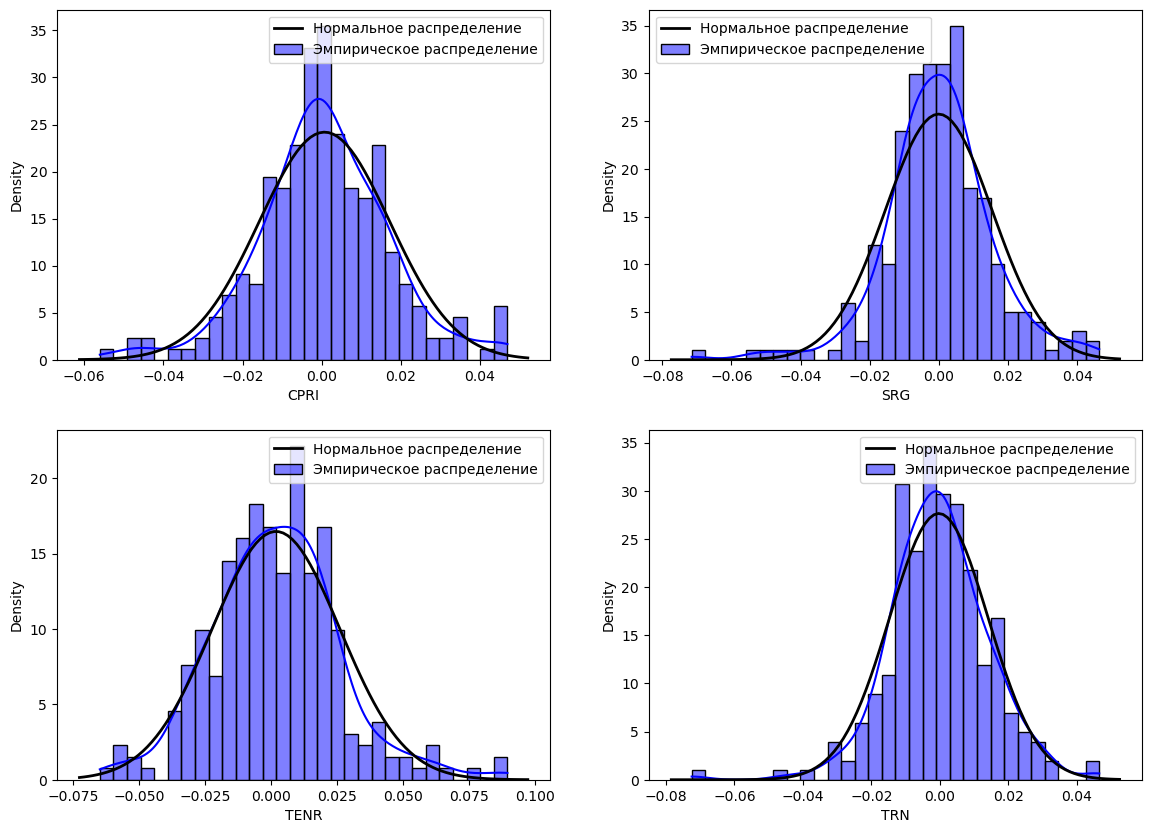

In [17]:
returns_data = [log_returns_pareto['CPRI'], log_returns_pareto['SRG'], log_returns_pareto['TENR'], log_returns_pareto['TRN']]

plt.figure(figsize=(14, 10))

for i, returns in enumerate(returns_data, 1):
    plt.subplot(2, 2, i)
    sns.histplot(returns, bins=30, kde=True, stat="density", label = 'Эмпирическое распределение', color='blue')
    mean = np.mean(returns)
    std = np.std(returns)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
    plt.legend()

shapiro_test = stats.shapiro(log_returns_pareto['CPRI'])
print(f'CPRI Тест Шапиро-Уилка: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
ks_test = kstest(log_returns_pareto['CPRI'], 'norm')
print(f'CPRI Тест Колмогорова-Смирнова: statistic={ks_test.statistic}, p-value={ks_test.pvalue}')
print()

shapiro_test = stats.shapiro(log_returns_pareto['SRG'])
print(f'SRG Тест Шапиро-Уилка: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
ks_test = kstest(log_returns_pareto['SRG'], 'norm')
print(f'Тест Колмогорова-Смирнова: statistic={ks_test.statistic}, p-value={ks_test.pvalue}')
print()

shapiro_test = stats.shapiro(log_returns_pareto['TENR'])
print(f'TENR Тест Шапиро-Уилка: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
ks_test = kstest(log_returns_pareto['TENR'], 'norm')
print(f'Тест Колмогорова-Смирнова: statistic={ks_test.statistic}, p-value={ks_test.pvalue}')
print()

shapiro_test = stats.shapiro(log_returns_pareto['TRN'])
print(f'TRN Тест Шапиро-Уилка: statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')
ks_test = kstest(log_returns_pareto['TRN'], 'norm')
print(f'Тест Колмогорова-Смирнова: statistic={ks_test.statistic}, p-value={ks_test.pvalue}')
print()

Визуально распределения похожи на нормальные, но проведя тесты Шапиро-Уилка и Колмогорова-Смирнова для проверки гипотезы Н_0 "случайная величина X распределена нормально" с заданным уровнем доверия 0.05 мы видим, что p-value для наших 4 активов гораздом меньше данного значения, следовательно, мы отвергаем гипотезу H_0, мы не можем считать, что распределения доходностей подчиняются нормальному закону  распределения

#### 8 задание

Проверим, являются ли заданные распределения распределением стьюдента

In [18]:
log_returns = {
    'CPRI': log_returns_pareto['CPRI'],
    'SRG': log_returns_pareto['SRG'],
    'TENR': log_returns_pareto['TENR'],
    'TRN': log_returns_pareto['TRN']
}

for name, returns in log_returns.items():
    df, loc, scale = stats.t.fit(returns)  #cтепени свободы, среднее и стандартное отклонение
    D, p_value = stats.kstest(returns, 't', args=(df, loc, scale))

    print(f"{name}")
    print(f"KS statistic: {D}")
    print(f"p-value: {p_value}\n")

CPRI
KS statistic: 0.05558389297523114
p-value: 0.39566708152938757

SRG
KS statistic: 0.03616586843255687
p-value: 0.8803405955604034

TENR
KS statistic: 0.038467041452383666
p-value: 0.8305403214504236

TRN
KS statistic: 0.029642002618293348
p-value: 0.9736588870929225



Применив тест Колмогорова-Смирнова и, получив значения p-value, приходим к выводу что гипотеза Н_0 "случайная величина X имеет распределение Стьюдента" не может быть отвергнута. Визуальная оценка и результаты тестов могут противоречить друг другу по причине высокой чувствительности теста к отклонениям. В то время как графики показывают хорошее соответствие нормальному распределению, малое p-value может указывать на наличие мелких отклонений (например, выбросов, толстых хвостов или асимметрии), которые могут быть неочевидны визуально. 